# Modellbewertung in Maschinellem Lernen

In diesem Notebook werden wir verschiedene Methoden und Metriken zur Bewertung von Modellen untersuchen. Dazu gehören:
- Mean Squared Error (MSE)
- R-squared
- Residual Plots
- Distribution Plots

Wir werden Beispiele für gute und schlechte Modelle mit Grafiken darstellen und erklären, wie man diese Daten und Diagramme interpretiert.

## 1. Mean Squared Error (MSE)

**MSE** misst den durchschnittlichen quadratischen Fehler zwischen den tatsächlichen und den vorhergesagten Werten. Ein niedriger MSE deutet darauf hin, dass das Modell gut zu den Daten passt.

Gutes Modell - MSE: 0.375
Schlechtes Modell - MSE: 18.3125


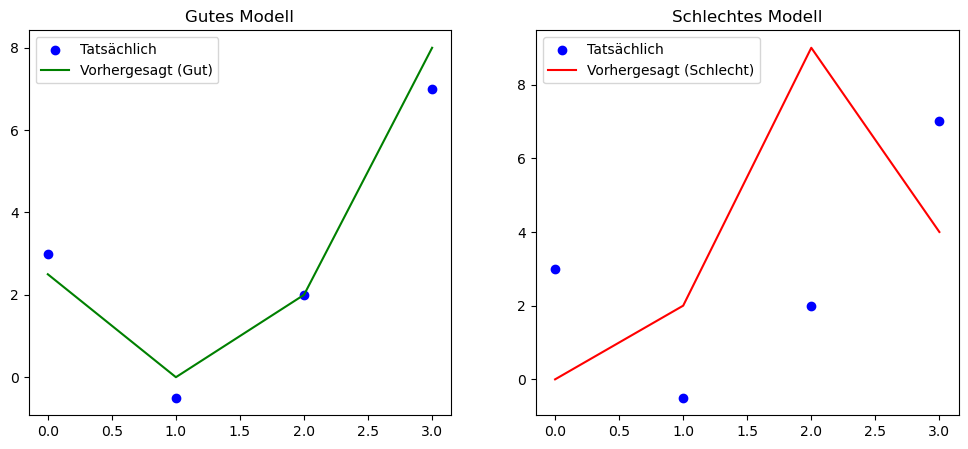

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Beispieldaten
y_true = np.array([3, -0.5, 2, 7])
y_pred_good = np.array([2.5, 0.0, 2, 8])  # Gute Vorhersagen
y_pred_bad = np.array([0, 2, 9, 4])       # Schlechte Vorhersagen

# MSE berechnen
mse_good = mean_squared_error(y_true, y_pred_good)
mse_bad = mean_squared_error(y_true, y_pred_bad)

print(f"Gutes Modell - MSE: {mse_good}")
print(f"Schlechtes Modell - MSE: {mse_bad}")

# Plotten der tatsächlichen und vorhergesagten Werte
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_true)), y_true, label='Tatsächlich', color='blue')
plt.plot(range(len(y_true)), y_pred_good, label='Vorhergesagt (Gut)', color='green')
plt.title('Gutes Modell')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(range(len(y_true)), y_true, label='Tatsächlich', color='blue')
plt.plot(range(len(y_true)), y_pred_bad, label='Vorhergesagt (Schlecht)', color='red')
plt.title('Schlechtes Modell')
plt.legend()

plt.show()

## R-squared (R²)

R² zeigt, welcher Anteil der Varianz der abhängigen Variable durch die unabhängigen Variablen erklärt wird. Ein R²-Wert nahe 1 deutet auf eine gute Modellanpassung hin.

In [2]:
from sklearn.metrics import r2_score

# R-squared berechnen
r2_good = r2_score(y_true, y_pred_good)
r2_bad = r2_score(y_true, y_pred_bad)

print(f"Gutes Modell - R²: {r2_good}")
print(f"Schlechtes Modell - R²: {r2_bad}")

# Interpretation:
# - Ein R²-Wert nahe 1 bedeutet, dass das Modell gut erklärt, wie die unabhängigen Variablen die abhängige Variable beeinflussen.
# - Ein R²-Wert nahe 0 bedeutet, dass das Modell wenig erklärt.
# - Ein negativer R²-Wert kann darauf hindeuten, dass das Modell sehr schlecht ist.


Gutes Modell - R²: 0.9486081370449679
Schlechtes Modell - R²: -1.5096359743040684


# Residual plots

Residual Plots zeigen die Differenz zwischen den tatsächlichen und den vorhergesagten Werten. Idealerweise sollten die Residuen gleichmäßig um die x-Achse verteilt sein.

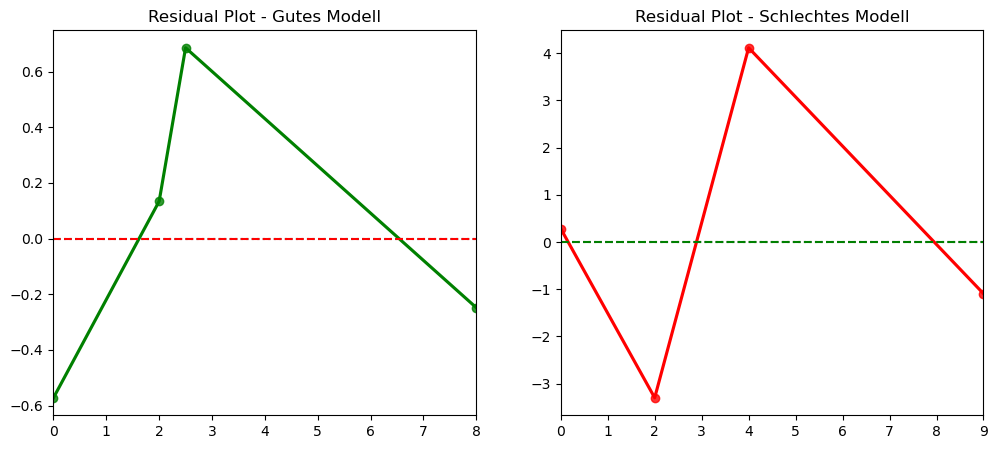

In [4]:
import seaborn as sns

# Berechnung der Residuen
residuals_good = y_true - y_pred_good
residuals_bad = y_true - y_pred_bad

# Plotten der Residuen
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.residplot(x=y_pred_good, y=residuals_good, lowess=True, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot - Gutes Modell')

plt.subplot(1, 2, 2)
sns.residplot(x=y_pred_bad, y=residuals_bad, lowess=True, color='red')
plt.axhline(0, color='green', linestyle='--')
plt.title('Residual Plot - Schlechtes Modell')

plt.show()

# Interpretation:
# - Bei einem guten Modell sollten die Residuen zufällig um die Nulllinie verteilt sein.
# - Wenn es ein Muster oder eine Struktur in den Residuen gibt, könnte dies auf Probleme wie Nicht-Linearität oder unzureichende Modellierung hinweisen.


# Distribution Plot

Distribution Plots helfen, die Verteilung der tatsächlichen Werte mit der Verteilung der vorhergesagten Werte zu vergleichen.

c:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\marco\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


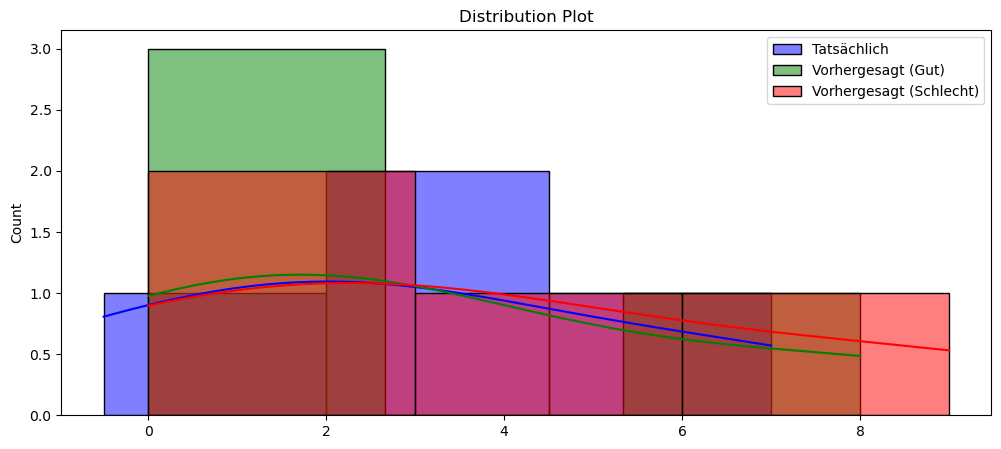

In [5]:
# Distribution Plot erstellen
plt.figure(figsize=(12, 5))

sns.histplot(y_true, color='blue', label='Tatsächlich', kde=True)
sns.histplot(y_pred_good, color='green', label='Vorhergesagt (Gut)', kde=True)
sns.histplot(y_pred_bad, color='red', label='Vorhergesagt (Schlecht)', kde=True)

plt.legend()
plt.title('Distribution Plot')
plt.show()

# Interpretation:
# - Ein gutes Modell zeigt eine ähnliche Verteilung der vorhergesagten Werte im Vergleich zu den tatsächlichen Werten.
# - Große Unterschiede in den Verteilungen können auf ein schlechtes Modell hinweisen.
